# Ôn tập giữa kỳ


In [1]:
# import library...
# ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [2]:
brfss = pd.read_csv("./data/brfss_2000.csv")
brfss.head()

df = pd.DataFrame(brfss)

In [3]:
# so dong va so cot
brfss.shape

(20000, 9)

In [4]:
df.describe()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,0.745700,0.873800,0.472050,67.182900,169.68295,155.093850,45.068250
std,0.435478,0.332083,0.499231,4.125954,40.08097,32.013306,17.192689
min,0.000000,0.000000,0.000000,48.000000,68.00000,68.000000,18.000000
25%,0.000000,1.000000,0.000000,64.000000,140.00000,130.000000,31.000000
50%,1.000000,1.000000,0.000000,67.000000,165.00000,150.000000,43.000000
75%,1.000000,1.000000,1.000000,70.000000,190.00000,175.000000,57.000000
max,1.000000,1.000000,1.000000,93.000000,500.00000,680.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   exerany   20000 non-null  int64 
 1   hlthplan  20000 non-null  int64 
 2   smoke100  20000 non-null  int64 
 3   height    20000 non-null  int64 
 4   weight    20000 non-null  int64 
 5   wtdesire  20000 non-null  int64 
 6   age       20000 non-null  int64 
 7   gender    20000 non-null  object
 8   genhlth   20000 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [6]:
male = df[(df["gender"] == "m")].shape[0]
female = df[(df["gender"] == "f")].shape[0]


print("so nam :", male)
print("so nu :", female)
print("ti le giua nam va nu :", male/female)

so nam : 9569
so nu : 10431
ti le giua nam va nu : 0.9173617102866456


In [81]:
fairWithHeltpPlan = df[(df["hlthplan"] == 1) & (df["genhlth"] == "fair")].shape[0]
fairWithHeltpPlan

1634

### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [82]:
# chuyern doi du lieu tue centimeters sang inches
df["height"] = df["height"] * 2.54
df

df["weight"] = df["weight"] * 0.453592
df

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,177.80,79.378600,175,77,m,good
1,0,1,1,162.56,56.699000,115,33,f,good
2,1,1,1,152.40,47.627160,105,49,f,good
3,1,1,0,167.64,59.874144,124,42,f,good
4,0,1,0,154.94,68.038800,130,55,f,very good
...,...,...,...,...,...,...,...,...,...
19995,1,1,0,167.64,97.522280,140,23,f,good
19996,0,1,0,185.42,90.718400,185,35,m,excellent
19997,0,1,0,165.10,97.975872,150,57,f,poor
19998,1,1,0,170.18,74.842680,165,81,f,good


In [84]:
fairWithHeltpPlan = df[(df["weight"] > (df["wtdesire"] * 0.453592))].shape[0]
fairWithHeltpPlan / df.shape[0]

0.6382

### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

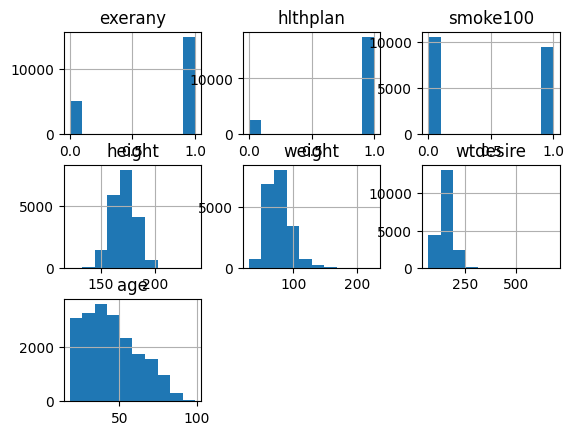

In [86]:
df.hist()
plt.show()

## Vậy là có 3 trường Height, Weight, Wtdesire. Có phân phối chuẩn

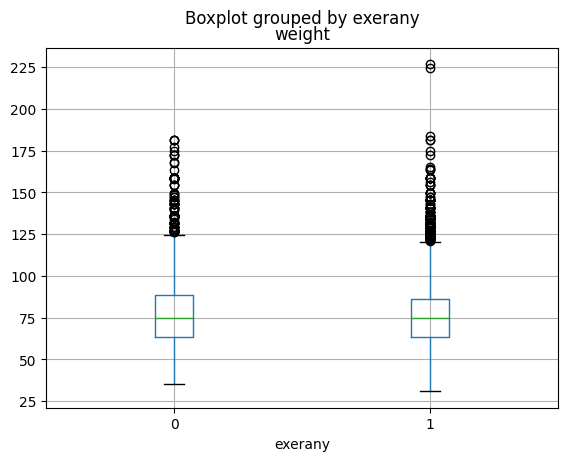

In [87]:
#b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục và không tập thể dục
df.boxplot(column="weight", by="exerany")
plt.show()



### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



In [88]:
# Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?
df["age"].describe()


count    20000.000000
mean        45.068250
std         17.192689
min         18.000000
25%         31.000000
50%         43.000000
75%         57.000000
max         99.000000
Name: age, dtype: float64

In [92]:
# tuổi trung bình của nam và nữ
avgAge = df["age"].mean()
stdAge = df["age"].std()
quantileAge = df["age"].quantile([0.25, 0.5, 0.75])

avgAge, stdAge, quantileAge

(45.06825,
 17.19268947448503,
 0.25    31.0
 0.50    43.0
 0.75    57.0
 Name: age, dtype: float64)

### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



Tỉ lệ người hút thuốc theo tuổi age
18     92
19    110
20    127
21    154
22    137
     ... 
92      4
93      2
96      1
97      1
99      1
Length: 79, dtype: int64
Tỉ lệ người hút thuốc 0.47205


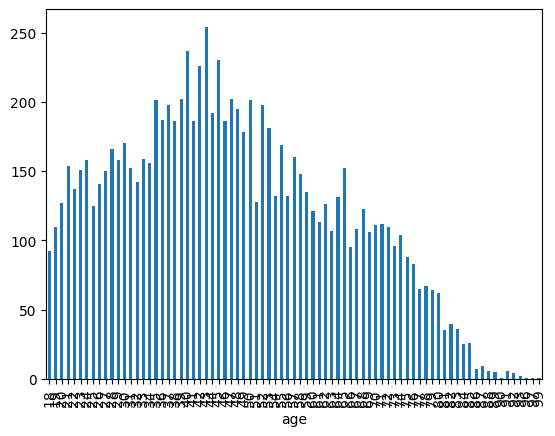

In [96]:
# Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?
smoke = df[(df["smoke100"] == 1)].shape[0]
smoke / df.shape[0]

# Tỉ lệ người hút thuốc theo tuổi
smokeByAge = df[(df["smoke100"] == 1)].groupby("age").size()
smokeByAge / df.groupby("age").size()



print("Tỉ lệ người hút thuốc theo tuổi", smokeByAge)
print("Tỉ lệ người hút thuốc", smoke / df.shape[0])


# ve do thi
smokeByAge.plot(kind="bar")
plt.show()

### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [8]:
# Tính BMI cho nam
BMIMale = (df[df["gender"] == "m"]["weight"].astype(float) / (df[df["gender"] == "m"]["height"].astype(float) / 100) ** 2).mean()

# Tính BMI cho nữ
BMIFemale = (df[df["gender"] == "f"]["weight"].astype(float) / (df[df["gender"] == "f"]["height"].astype(float) / 100) ** 2).mean()

BMIMale, BMIFemale


(382.98250047040466, 366.16141361877106)

### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [99]:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Tính chỉ số BMI cho mỗi người
df['BMI'] = df['weight'].astype(float) / (df['height'].astype(float) / 100) ** 2

# Phân loại mức BMI theo tiêu chuẩn CDC
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25.0 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(classify_bmi)

# Tính tỉ lệ béo phì (BMI >= 30) theo giới tính
obesity_gender = df[df['BMI_Category'] == 'Obese'].groupby('gender').size() / df.groupby('gender').size()

# Tính tỉ lệ béo phì theo nhóm tuổi (tuổi được chia làm các khoảng, ví dụ: <30, 30-50, >50)
bins = [0, 30, 50, 100]  # chia độ tuổi thành các nhóm
labels = ['<30', '30-50', '>50']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Tính tỉ lệ béo phì theo độ tuổi
obesity_age = df[df['BMI_Category'] == 'Obese'].groupby('age_group').size() / df.groupby('age_group').size()

# Kết quả
obesity_gender, obesity_age


C:\Users\thong\AppData\Local\Temp\ipykernel_8160\2020101894.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity_age = df[df['BMI_Category'] == 'Obese'].groupby('age_group').size() / df.groupby('age_group').size()
C:\Users\thong\AppData\Local\Temp\ipykernel_8160\2020101894.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity_age = df[df['BMI_Category'] == 'Obese'].groupby('age_group').size() / df.groupby('age_group').size()


(gender
 f    0.201802
 m    0.213815
 dtype: float64,
 age_group
 <30      0.149768
 30-50    0.227906
 >50      0.222543
 dtype: float64)

---